# Data Exploration and Technical Communication

# Introduction
#### About the dataset
This is a sample superstore dataset. This CSV file contains the superstore sales data that can be used to perform extensive data analysis to deliver insights on how the company can increase its profits while minimizing losses.

#### Aim of the Analysis
The goal of this analysis is to identify key insights from the sales dataset to support data-driven marketing and business decisions. Specifically, it aims to:

- Analyze Sales Performance – Determine the best-selling product categories and sub-categories.
- Evaluate Profitability – Identify the most and least profitable products to optimize pricing and inventory strategies.
- Assess Discount Impact – Understand how discounting affects sales and profit margins.
- Provide Actionable Recommendations – Suggest improvements in marketing focus, pricing adjustments, and discount strategies.

The findings will help the business maximize profitability, improve sales efficiency, and refine marketing efforts.


You can download a copy of the dataset [here](https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset)

# Load the dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = r"SampleSuperstore.csv"
df = pd.read_csv(file_path)

# Display the first five records of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
# Check for missing values
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

There are no missing values

### Check for duplicate values

Ignoring duplicate values can lead to misleading insights, especially in `sales and profitability analysis`.

Duplicate records might mean:
- `Accidental Re-entry` – Data might have been recorded multiple times due to system errors.
- `Genuine Repeated Transactions` – Some purchases may appear similar but are legitimate (e.g., multiple orders of the same item).
- `Data Inconsistencies` – If duplicates are a result of data errors, they need to be cleaned before analysis.

I will now check for duplicate records and analyze whether removing them impacts the insights.

In [3]:
# Check and count duplicate records
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# View duplicate records (if needed)
duplicates = df[df.duplicated()]
duplicates

Number of duplicate rows: 17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [4]:
df[df.duplicated()].count()

Ship Mode       17
Segment         17
Country         17
City            17
State           17
Postal Code     17
Region          17
Category        17
Sub-Category    17
Sales           17
Quantity        17
Discount        17
Profit          17
dtype: int64

### Should I remove duplicates?
- If duplicates exist **without any changes** to say `order ID`, `timestamp`, or `transaction details`, they should be removed to avoid inflating sales figures.
- If they represent real repeated sales, I should keep them and further analyze them for patterns.

### Ignore duplicates (in this instance)

Since there are no remarkable evidence to support the duplicate records in the dataset, so I have decided to keep them.

In [5]:
# Compute concise informations about the dataset
basic_infos = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
Numerical Columns: ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


### Observations
The initial dataset review shows that the dataset contains 9,994 records with 13 columns. Here’s a quick breakdown of the key variables:

- **Categorical Variables:** `Ship Mode`, `Segment`, `Country`, `City`, `State`, `Region`, `Category`, `Sub-Category`
- **Numerical Variables:** `Sales`, `Quantity`, `Discount`, `Profit`, `Postal Code`

### Next Steps

I will now explore some summary statistics and key insights, such as top-selling products, top-selling sub-categories, user trends, and potential anomalies.

In [7]:
# Generate summary statistics of numerical columns
summary_stats = df.describe()

# Get unique values count for categorical variables
unique_values = {col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}

# Compute top-selling product categories
top_selling_categories = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

# Finding the most profitable and least profitable sub-categories
profit_by_subcategory = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)


# Print the outputs with two new line spaces
print("Summary Statistics:\n", summary_stats, "\n\n")
print("Unique Values:\n", unique_values, "\n\n")
print("Top-Selling Product Categories:\n", top_selling_categories, "\n\n")
print("Profit by Product Sub-Category:\n", profit_by_subcategory, "\n\n")


Summary Statistics:
         Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000 


Unique Values:
 {'Ship Mode': 4, 'Segment': 3, 'Country': 1, 'City': 531, 'State': 49, 'Region': 4, 'Category': 3, 'Sub-Category': 17} 


Top-Selling Product Categories:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64 


Profit by Produ

## Key Initial Insights:
#### Top-Selling Product Categories:

- **Technology** leads in sales (836,154.03), followed by **Furniture** (741,999.79) and **Office Supplies** ($719,047.03).


#### Most and Least Profitable Sub-Categories:
- The most profitable sub-category is Copiers (55,617.82 profit), followed by Phones (44,515.73 profit).
- The least profitable sub-category is Tables (-17,725.48 loss), followed by Bookcases (-3,472.56 loss).


### Discount Distribution and Potential Impact:
The dataset includes discounts ranging from 0% to 80%, with a median discount of 20%.
Large discounts may be contributing to the losses in specific product categories like Tables and Bookcases.

## Visualizations
Next, I will generate visualizations to better illustrate these insights.

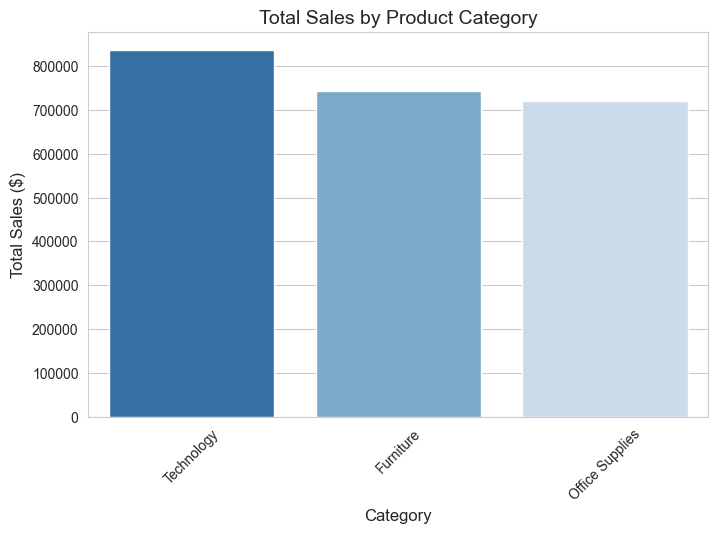

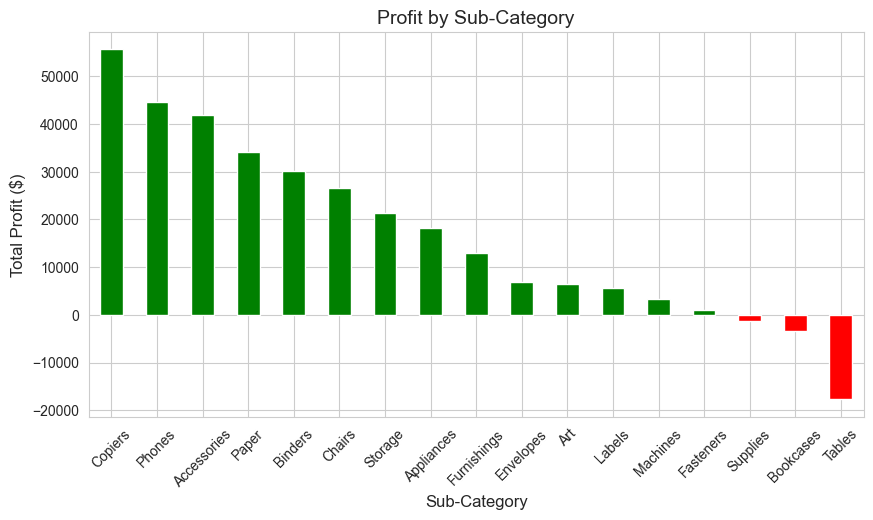

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")

# Plot total sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x=top_selling_categories.index, y=top_selling_categories.values, palette="Blues_r")
plt.title("Total Sales by Product Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plot profit distribution by sub-category
plt.figure(figsize=(10, 5))
profit_by_subcategory.plot(kind="bar", color=["red" if x < 0 else "green" for x in profit_by_subcategory.values])
plt.title("Profit by Sub-Category", fontsize=14)
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


The visualizations confirm that Technology dominates sales, while Tables and Bookcases are struggling with profitability.

## Marketing Insight Report

#### Introduction
This report provides an initial exploratory analysis of the provided sales dataset. The objective is to identify key insights related to sales performance, product profitability, and discount trends to support data-driven marketing decisions. The dataset consists of 9,994 transactions covering different regions, product categories, and customer segments.

#### Key Observations
- Top-Selling Product Categories:
    - The highest revenue comes from the Technology category (836,154.03), followed by Furniture (741,999.79) and Office Supplies ($719,047.03).
    - This suggests that Technology products drive the most sales and should be a focal point for marketing campaigns.

- Profitability Trends:
    - The most profitable sub-category is Copiers (55,617.82 profit), followed by Phones (44,515.73 profit).
    - The least profitable sub-category is Tables (-17,725.48 loss), followed by Bookcases (-3,472.56 loss).
    - Losses in these categories may be attributed to high discount rates or excessive inventory costs.

#### Discount and Sales Impact:
- Discounts in the dataset range from 0% to 80%, with a median discount of 20%.
- Large discounts correlate with negative profitability in certain categories like Tables and Bookcases, suggesting a need to optimize discounting strategies to maintain profitability.


#### Conclusion
The initial analysis highlights key areas of focus for marketing and pricing strategies. Technology products should be promoted more aggressively, while unprofitable categories like Tables and Bookcases require a review of pricing and discount structures. Further analysis is recommended to explore customer segmentation and regional sales performance.

Appreciations to [HNG Internship](https://hng.tech/internship) for providing the inspiration for this analysis.

You can check my [portfolio](https://github.com/elijah-alabi-ng/My-Profile.md) for more data analysis, insights and recommendations.